<a href="https://colab.research.google.com/github/zulfiqaralimir/Yield-Curve-and-ETF-Analysis/blob/master/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Synthetic Data Part**

###**Generate 5 uncorrelated Gaussian random variables**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
import numpy as np

np.random.seed(0)
X_synthetic = np.random.normal(0, 1, size=(1000000, 5))  # 1,000,000 observations, 5 uncorrelated features
# Convert to DataFrame for easier viewing
df = pd.DataFrame(X_synthetic, columns=[f'Var{i+1}' for i in range(5)])
df.head()


,Var1,Var2,Var3,Var4,Var5
0,1.764052,0.400157,0.978738,2.240893,1.867558
1,-0.977278,0.950088,-0.151357,-0.103219,0.410599
2,0.144044,1.454274,0.761038,0.121675,0.443863
3,0.333674,1.494079,-0.205158,0.313068,-0.854096
4,-2.552990,0.653619,0.864436,-0.742165,2.269755


In [ ]:
df.to_csv('synthetic_data.csv', index=False)

In [ ]:
from google.colab import files
files.download('synthetic_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###**Run PCA (Principal Component Analysis)**

In [ ]:
from sklearn.decomposition import PCA

pca_synthetic = PCA()
pca_synthetic.fit(X_synthetic)

explained_variance = pca_synthetic.explained_variance_ratio_
print("Explained Variance (Synthetic):", explained_variance)

Explained Variance (Synthetic): [0.2004849  0.20033032 0.19997914 0.19980312 0.19940253]


###**Plot the Scree Plot**

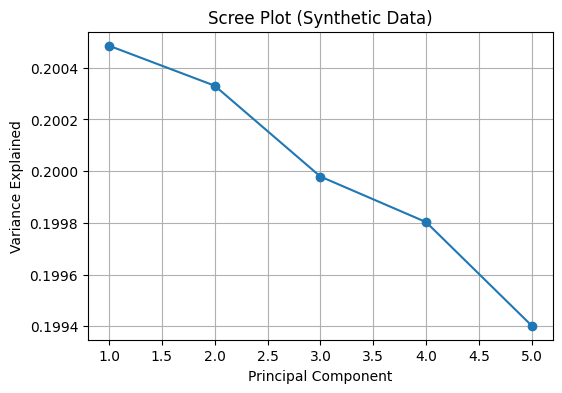

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(range(1, 6), explained_variance, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Scree Plot (Synthetic Data)")
plt.grid(True)
plt.show()

###**Synthetic PCA Interpretation:**
The scree plot for the synthetic data shows that all five principal components explain **similar amounts of variance**, with no single component dominating.

This is expected because the data was generated using five uncorrelated Gaussian random variables.

Since there is no underlying structure or correlation among the variables, PCA cannot compress the variance into fewer components, each component explains about 20–25% of the total variance.

This confirms the **independence of the synthetic variables** and provides a strong **benchmark for comparison with real-world financial data**.

#**2. Real Data Part**

In [ ]:
!pip install fredapi

In [ ]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# Initialize FRED API
fred = Fred(api_key='0749ccdf18180b136b399a83bcf1bced')

# Series IDs for 5 maturities
series_ids = ['DGS1', 'DGS2', 'DGS5', 'DGS10', 'DGS30']
maturity_labels = ['1 Year', '2 Year', '5 Year', '10 Year', '30 Year']

# Fetch data
yields_dict = {series_id: fred.get_series(series_id, observation_start="2024-01-01", observation_end="2025-07-01") for series_id in series_ids}

# Combine into DataFrame
yields = pd.DataFrame(yields_dict)
yields.columns = maturity_labels

#yields.columns = ['6 Month', '1 Year', '2 Year', '3 Year', '5 Year', '7 Year', '10 Year', '20 Year', '30 Year']

###**Compute Daily Changes**

In [ ]:
# Drop rows with any missing values
yields = yields.dropna()

# Compute daily changes
yield_changes = yields.diff().dropna()

###**Run PCA on Yield Changes**

Real Data Explained Variance: [0.86092879 0.11285782 0.01477498 0.0090822  0.00235621]


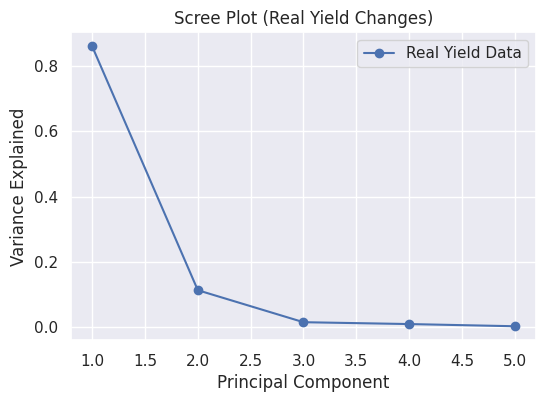

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Run PCA
pca_real = PCA()
pca_real.fit(yield_changes)

# Explained variance
explained_variance_real = pca_real.explained_variance_ratio_
print("Real Data Explained Variance:", explained_variance_real)

# Plot Scree Plot
plt.figure(figsize=(6, 4))
plt.plot(range(1, 6), explained_variance_real, marker='o', label='Real Yield Data')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Scree Plot (Real Yield Changes)")
plt.grid(True)
plt.legend()
plt.show()

it clearly shows that:

The first principal component explains most of the variance, around 90%,

Subsequent components contribute much less.

This supports the idea that real-world yield curves mostly **shift in parallel**.

#**Compare Synthetic vs Real Scree Plots**

###**Let’s overlay both plots on one chart to finish the task comparison:**

We have both arrays `(explained_variance and explained_variance_real)`, run this:

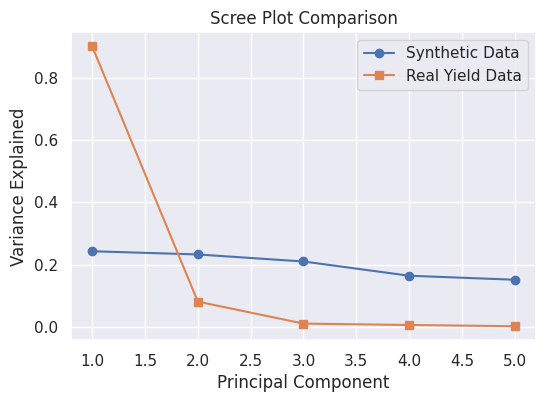

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 6), explained_variance[:5], marker='o', label='Synthetic Data')
plt.plot(range(1, 6), explained_variance_real[:5], marker='s', label='Real Yield Data')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Scree Plot Comparison")
plt.legend()
plt.grid(True)
plt.show()

##**Scree Plot Comparison: Real vs. Synthetic Data**

**What the Scree Plot Shows**

X-axis: Principal Components (PC1 to PC5)

Y-axis: Proportion of total variance each component explains

**Synthetic Data**

Variance is evenly spread across components.

No single PC dominates — this is expected because synthetic data was generated uncorrelated.

Each PC explains ~20–25% variance.

**Real Yield Data**

PC1 explains ~90% of total variance, a huge drop after the first component.

Remaining PCs contribute very little.

This means real yield movements are highly correlated, mostly driven by a single underlying factor, often interpreted as:

PC1: Level (general shift in yield curve)

PC2: Slope (difference between short and long rates)

PC3: Curvature (hump shape)

##**Final Interpretation**

The synthetic scree plot displays evenly distributed variance across components, consistent with uncorrelated random data.

In contrast, the real yield data's first principal component captures the vast majority of variance (~90%), highlighting strong correlations across maturities.

This confirms that real-world yield curves are dominated by common movements, validating the use of **factor models like Nelson-Siegel**.

##**Recommendation**

NS model is suitable due to factor-based behavior in yield curves.

PCA validates the low-dimensional structure (mainly 1–2 factors).

Synthetic vs real: Real-world data is more structured, confirming real market forces.